In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv("Apple-Fitness-Data.csv")
print(data.head())

# Plotting with Pandas
#data.plot(x='Date', y='YourColumnName', kind='line', title='Steps Over Time')

# Show the plot
#plt.show()


         Date       Time  Step Count  Distance  Energy Burned  \
0  2023-03-21  16:01:23           46   0.02543         14.620   
1  2023-03-21  16:18:37          645   0.40041         14.722   
2  2023-03-21  16:31:38           14   0.00996         14.603   
3  2023-03-21  16:45:37           13   0.00901         14.811   
4  2023-03-21  17:10:30           17   0.00904         15.153   

   Flights Climbed  Walking Double Support Percentage  Walking Speed  
0                3                              0.304          3.060  
1                3                              0.309          3.852  
2                4                              0.278          3.996  
3                3                              0.278          5.040  
4                3                              0.281          5.184  


Let’s have a look if this data contains any null values or not:

In [2]:
print(data.isnull().sum())

Date                                 0
Time                                 0
Step Count                           0
Distance                             0
Energy Burned                        0
Flights Climbed                      0
Walking Double Support Percentage    0
Walking Speed                        0
dtype: int64


So, the data doesn’t have any null values. Let’s move further by analyzing my step count over time:

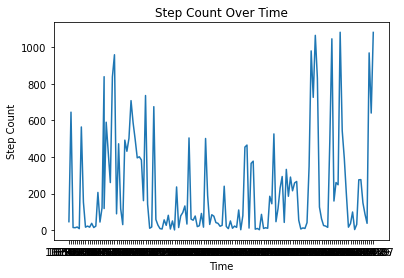

In [3]:
# Step Count Over Time
# Plotting with Matplotlib
plt.plot(data['Time'], data['Step Count'])
plt.title('Step Count Over Time')
plt.xlabel('Time')
plt.ylabel('Step Count')

# Show the plot
plt.show()

Now, let’s have a look at the distance covered over time:

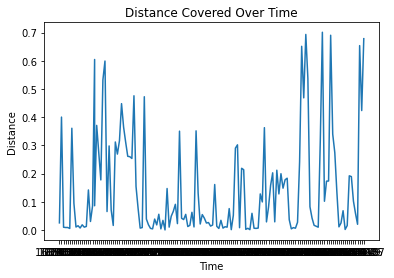

In [4]:
# Distance Covered Over Time
plt.plot(data['Time'], data['Distance'])
plt.title('Distance Covered Over Time')
plt.xlabel('Time')
plt.ylabel('Distance')

# Show the plot
plt.show()

Now, let’s have a look at my energy burned over time:

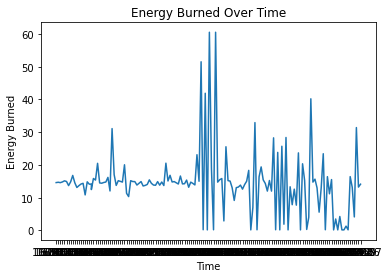

In [5]:
# Energy Burned Over Time
plt.plot(data['Time'], data['Energy Burned'])
plt.title('Energy Burned Over Time')
plt.xlabel('Time')
plt.ylabel('Energy Burned')

# Show the plot
plt.show()


Now, let’s have a look at my walking speed over time:

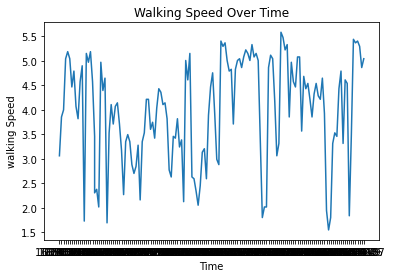

In [6]:
# Walking Speed Over Time
plt.plot(data['Time'], data['Walking Speed'])
plt.title('Walking Speed Over Time')
plt.xlabel('Time')
plt.ylabel('walking Speed')

# Show the plot
plt.show()


Now, let’s calculate and look at the average step counts per day:

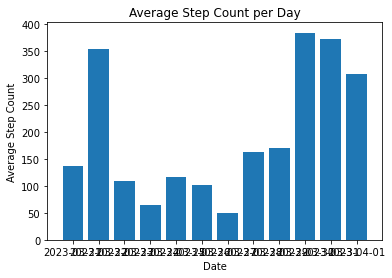

In [7]:
# Calculate Average Step Count per Day
average_step_count_per_day = data.groupby("Date")["Step Count"].mean().reset_index()

plt.bar(average_step_count_per_day['Date'], average_step_count_per_day['Step Count'])
plt.title('Average Step Count per Day')
plt.xlabel('Date')
plt.ylabel('Average Step Count')

# Show the plot
plt.show()

Now, let’s have a look at my walking efficiency over time:

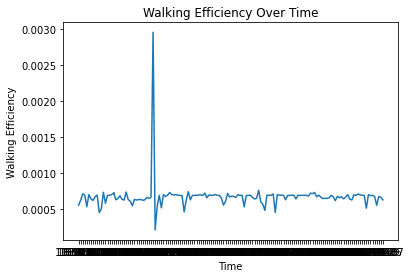

In [8]:
# Calculate Walking Efficiency
data["Walking Efficiency"] = data["Distance"] / data["Step Count"]

plt.plot(data['Time'], data['Walking Efficiency'])
plt.title('Walking Efficiency Over Time')
plt.xlabel('Time')
plt.ylabel('Walking Efficiency')

# Show the plot
plt.show()

Now, let’s have a look at the step count and walking speed variations by time intervals:

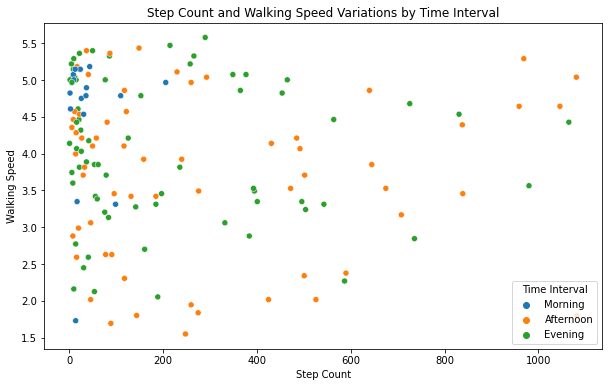

In [9]:
import seaborn as sns
# Create Time Intervals
time_intervals = pd.cut(pd.to_datetime(data["Time"]).dt.hour,
                        bins=[0, 12, 18, 24],
                        labels=["Morning", "Afternoon", "Evening"], 
                        right=False)

data["Time Interval"] = time_intervals

# Variations in Step Count and Walking Speed by Time Interval
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Step Count", y="Walking Speed", hue="Time Interval", data=data)
plt.title('Step Count and Walking Speed Variations by Time Interval')
plt.xlabel('Step Count')
plt.ylabel('Walking Speed')

# Show the plot
plt.show()


Now, let’s compare the daily average of all the health and fitness metrics:

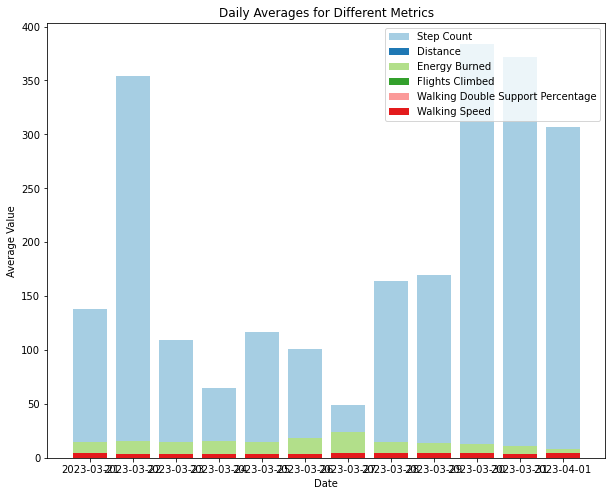

In [10]:
# Reshape data for treemap
daily_avg_metrics = data.groupby("Date").mean().reset_index()

daily_avg_metrics_melted = daily_avg_metrics.melt(id_vars=["Date"],
                                                  value_vars=["Step Count", "Distance",
                                                              "Energy Burned", "Flights Climbed",
                                                              "Walking Double Support Percentage",
                                                              "Walking Speed"])

# Create a bar chart with different colors for each metric
fig, ax = plt.subplots(figsize=(10, 8))
color = plt.cm.Paired(range(len(daily_avg_metrics_melted["variable"].unique())))
for i, metric in enumerate(daily_avg_metrics_melted["variable"].unique()):
    subset = daily_avg_metrics_melted[daily_avg_metrics_melted["variable"] == metric]
    ax.bar(subset["Date"], subset["value"], color=color[i], label=metric)

ax.set_title('Daily Averages for Different Metrics')
ax.set_xlabel('Date')
ax.set_ylabel('Average Value')
ax.legend(loc='upper right')

# Show the plot
plt.show()

The above graph represents each health and fitness metric as a rectangular tile. The size of each tile corresponds to the value of the metric and the colour of the tiles represents the metric itself. Hover data displays the exact average value for each metric when interacting with the visualization.

The Step Count metric dominates the visualization due to its generally higher numerical values compared to other metrics, making it difficult to visualize variations in the other metrics effectively. As the value of step count is higher than the value of all other metrics, let’s have a look at this visualization again without step counts:

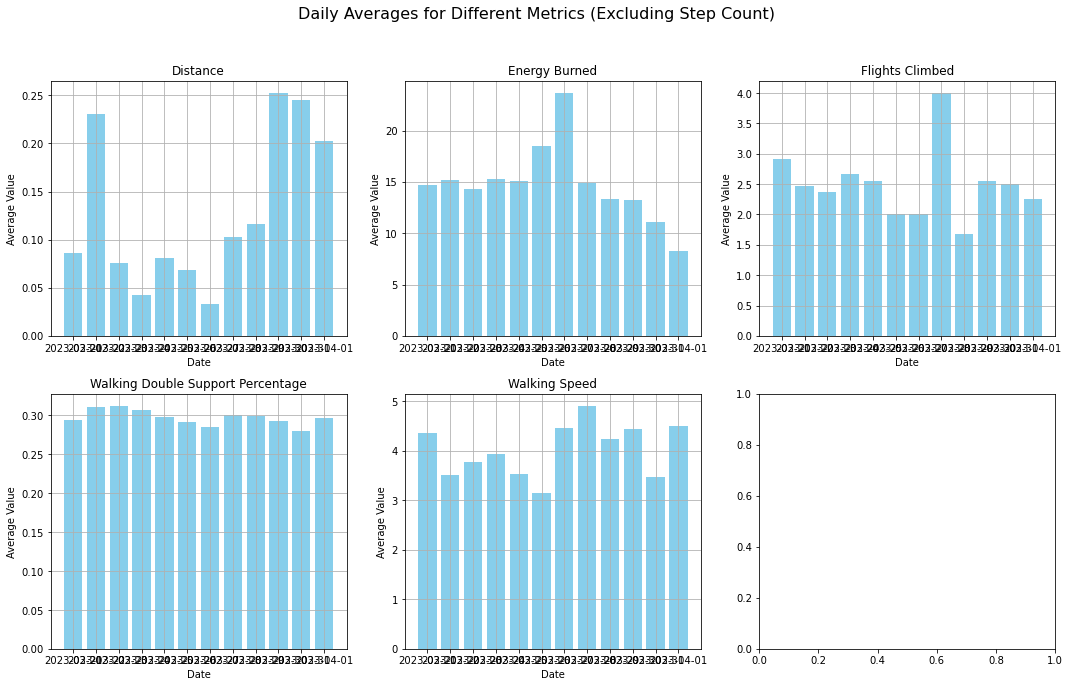

In [11]:

# Reshape data for treemap
daily_avg_metrics = data.groupby("Date").mean().reset_index()

# Select metrics excluding Step Count
metrics_to_visualize = ["Distance", "Energy Burned", "Flights Climbed",
                        "Walking Double Support Percentage", "Walking Speed"]

daily_avg_metrics_melted = daily_avg_metrics.melt(id_vars=["Date"], value_vars=metrics_to_visualize)

# Create subplots for each metric
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Daily Averages for Different Metrics (Excluding Step Count)', fontsize=16)

for i, metric in enumerate(metrics_to_visualize):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    subset = daily_avg_metrics_melted[daily_avg_metrics_melted["variable"] == metric]
    ax.bar(subset["Date"], subset["value"], color='skyblue')
    ax.set_title(metric)
    ax.set_xlabel('Date')
    ax.set_ylabel('Average Value')
    ax.grid(True)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()

So, this is how you can analyze and work with fitness data using Python.

Summary :
So this is how to perform Fitness Data Analysis using Python. Fitness Watch Data Analysis is a crucial tool for businesses in the health and wellness domain. By analyzing user data from fitness wearables, companies can understand user behaviour, offer personalized solutions, and contribute to improving users’ overall health and well-being. I hope you liked this article on Fitness Watch Data Analysis using Python. Feel free to ask valuable questions in the comments section below.